##### Import libraries and load data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

### Exploratory Data Analysis including:

###### i) Understanding of distribution of the features available

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df.shape

(10329, 3)

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
movies_df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [7]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
print(movies_df['title'].unique())

['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'A Very Murray Christmas (2015)' 'The Big Short (2015)'
 'Marco Polo: One Hundred Eyes (2015)']


In [9]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [10]:
ratings_df.shape

(105339, 4)

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [12]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


###### ii) Finding unique users and movies

In [14]:
uniqueUsers = ratings_df['userId'].unique()
uniqueMovies = movies_df['title'].unique()

In [15]:
# Displaying the number of unique users and movies
print("Number of unique users:", len(uniqueUsers))
print("Number of unique movies:", len(uniqueMovies))

Number of unique users: 668
Number of unique movies: 10327


###### iii) Average rating and Total movies at genre level.

In [16]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


###### From the above table we can conclue that

###### The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively.
###### There are 668 user who has given their ratings for 149532 movies.



.

In [17]:
df = pd.merge(movies_df, ratings_df, how='left', on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08


In [18]:
df.shape

(105343, 6)

In [19]:
df.describe()

,movieId,userId,rating,timestamp
count,105343.000000,105339.000000,105339.000000,1.053390e+05
mean,13382.696373,364.924539,3.516850,1.130424e+09
std,26172.698128,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


###### iv) Unique genres considered..

In [20]:
genres=[]
for genre in movies_df.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    

In [21]:
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

Design the 3 different types of recommendation modules as mentioned in the objectives.

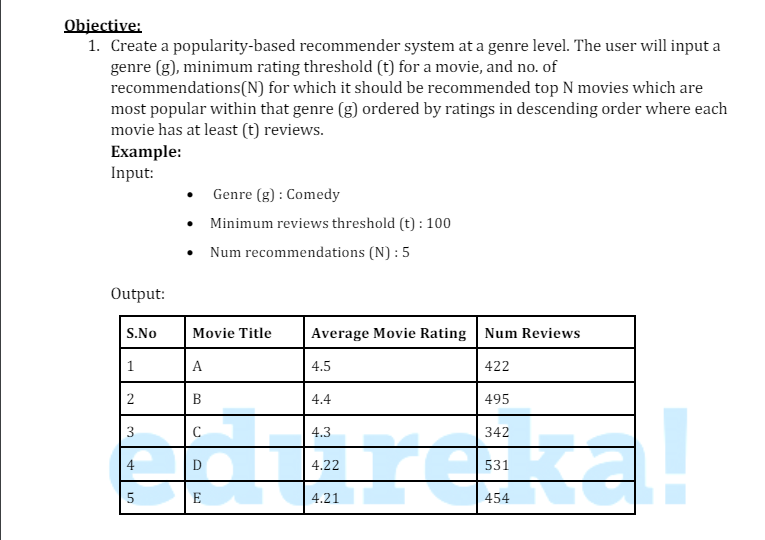

In [22]:
def popularity_based_recommender(genre, min_reviews_threshold, N):
    # Filter movies by genre
    genre_movies = movies_df[movies_df['genres'].str.contains(genre)]
    
    # Filter movies with minimum reviews threshold
    popular_movies = genre_movies[genre_movies['movieId'].isin(ratings_df['movieId'].value_counts()[ratings_df['movieId'].value_counts() >= min_reviews_threshold].index)]
    
    # Calculate average rating for each movie
    avg_rating_per_movie = ratings_df.groupby('movieId')['rating'].mean()
    
    # Merge average ratings with popular movies
    popular_movies = popular_movies.join(avg_rating_per_movie, on='movieId')
    
    # Sort by average rating in descending order
    popular_movies = popular_movies.sort_values(by='rating', ascending=False)
    
    # Select top N movies
    top_N_movies = popular_movies.head(N)
    
    return top_N_movies[['title', 'rating', 'movieId']]

# Example usage
genre = 'Comedy'
min_reviews_threshold = 100
N = 5
recommendations = popularity_based_recommender(genre, min_reviews_threshold, N)
print("Recommendations based on popularity within genre '{}':".format(genre))

recommendations

Recommendations based on popularity within genre 'Comedy':


,title,rating,movieId
922,Monty Python and the Holy Grail (1975),4.301948,1136
537,Fargo (1996),4.271144,608
959,"Princess Bride, The (1987)",4.163743,1197
260,Pulp Fiction (1994),4.160000,296
316,Forrest Gump (1994),4.138264,356


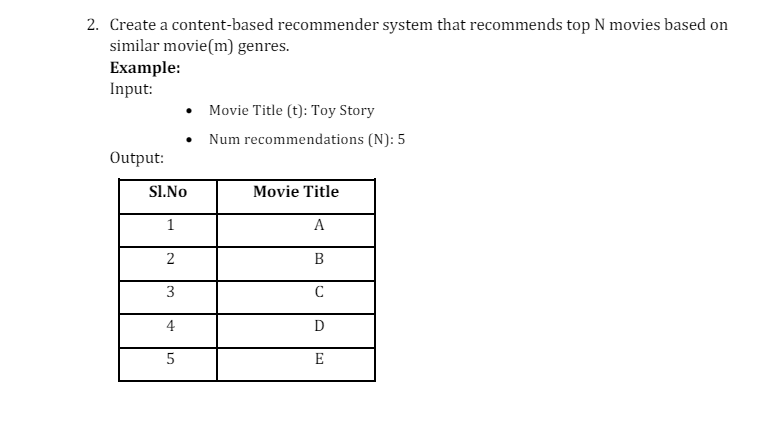

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Define a TF-IDF Vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN values with an empty string
movies_df['genres'] = movies_df['genres'].fillna('')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on genre similarity
def genre_based_recommender(title, N,cosine_sim=cosine_sim):
    
    if movie_title in movies_df['title'].values:
        print("Movie '{}' exists in the dataset.\n\n".format(movie_title))
    else:
        print("\n\nMovie '{}' does not exist in the dataset.".format(movie_title))
        return

    
    # Get the index of the movie that matches the title
    idx = movies_df.loc[movies_df['title'] == title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the N most similar movies
    sim_scores = sim_scores[1:N+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top N most similar movies
    return movies_df['title'].iloc[movie_indices]

# Example usage
movie_title = 'Father of the Bride Part II (1995)'
N = 5
recommendations = genre_based_recommender(movie_title, N, cosine_sim)
print("Recommendations based on similar movie genres to '{}':".format(movie_title))

recommendations

Movie 'Father of the Bride Part II (1995)' exists in the dataset.


Recommendations based on similar movie genres to 'Father of the Bride Part II (1995)':


17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
60                          Bio-Dome (1996)
63                            Friday (1995)
81                       Black Sheep (1996)
Name: title, dtype: object

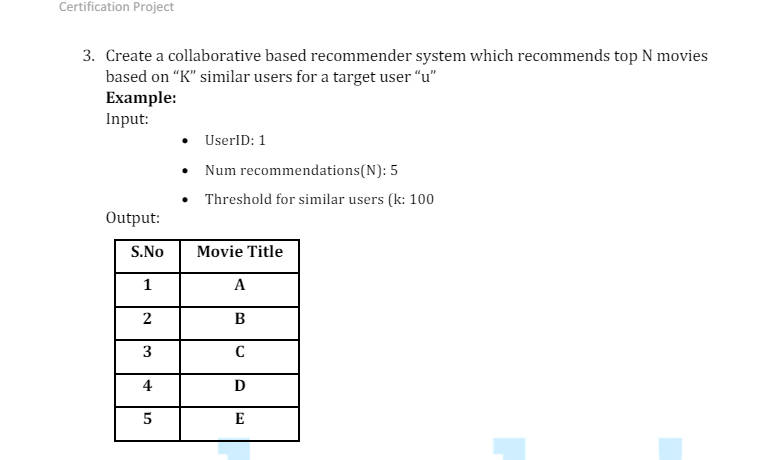

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to recommend movies based on similar users
def collaborative_recommender(user_id, N, k):
    # Filter ratings by the target user
    target_user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    # Get the movie IDs rated by the target user
    movie_ids_rated_by_user = target_user_ratings['movieId']
    
    # Find users who have rated the same movies as the target user
    similar_users = ratings_df[ratings_df['movieId'].isin(movie_ids_rated_by_user)]
    
    # Calculate user similarity based on ratings
    user_similarity_matrix = cosine_similarity(similar_users.pivot_table(index='userId', columns='movieId', values='rating').fillna(0))
    
    # Get the similarity scores of all users with the target user
    target_user_idx = similar_users[similar_users['userId'] == user_id].index[0]
    similarity_scores = list(enumerate(user_similarity_matrix[target_user_idx]))
    
    # Sort users based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top k similar users
    similar_users_indices = [x[0] for x in similarity_scores[1:k+1]]
    
    # Get the ratings of top k similar users
    similar_users_ratings = ratings_df[ratings_df['userId'].isin(similar_users_indices)]
    
    # Exclude movies already rated by the target user
    similar_users_ratings = similar_users_ratings[~similar_users_ratings['movieId'].isin(movie_ids_rated_by_user)]
    
    # Aggregate ratings of similar users
    aggregated_ratings = similar_users_ratings.groupby('movieId')['rating'].mean().reset_index()
    
    # Sort movies based on aggregated ratings
    top_N_movies = aggregated_ratings.sort_values(by='rating', ascending=False).head(N)
    
    # Get movie titles corresponding to movie IDs
    top_N_movie_titles = movies_df[movies_df['movieId'].isin(top_N_movies['movieId'])]['title']
    
    return top_N_movie_titles

# Example usage
user_id = 1
N = 5
k = 100
recommendations = collaborative_recommender(user_id, N, k)
print("Recommendations based on similar users for User {}: ".format(user_id))

recommendations

Recommendations based on similar users for User 1: 


467                    Ruby in Paradise (1993)
764                        Lost Horizon (1937)
1138                      Marvin's Room (1996)
5822    Alice Doesn't Live Here Anymore (1974)
8700                  Symbol (Shinboru) (2009)
Name: title, dtype: object

#### Additional/Optional: Create a GUI interface using Python libraries (ipywidgetsetc.) to play around with there commendation  modules. 

In [25]:
import ipywidgets as widgets
from IPython.display import display

1. popularity_based_recommender

In [29]:
genre = widgets.Text(description='Genre :')
min_reviews_threshold = widgets.IntText(description='Min Reviews Threshold :')
N = widgets.IntText(description='N :')

button = widgets.Button(description='Recommend')

Inputs = widgets.VBox([genre,min_reviews_threshold,N])
Interface = widgets.VBox([Inputs,button])

# button.on_click(popularity_based_recommender)

def on_button_clicked(b):
    
    print(popularity_based_recommender(genre.value,min_reviews_threshold.value,N.value))
    
    
button.on_click(on_button_clicked)

Interface

                                       title    rating  movieId
279         Shawshank Redemption, The (1994)  4.454545      318
695                    Godfather, The (1972)  4.392857      858
471                  Schindler's List (1993)  4.296371      527
956   One Flew Over the Cuckoo's Nest (1975)  4.272727     1193
537                             Fargo (1996)  4.271144      608
982           Godfather: Part II, The (1974)  4.260714     1221
974                        Goodfellas (1990)  4.259259     1213
733                        Casablanca (1942)  4.236000      912
8629                        Inception (2010)  4.189320    79132
2365                       Fight Club (1999)  4.188406     2959


2. genre_based_recommender

In [30]:
title = widgets.Text(description='Title :')
N = widgets.IntText(description='N :')


button = widgets.Button(description='Recommend')

Inputs = widgets.VBox([title,N])
Interface = widgets.VBox([Inputs,button])


def on_button_clicked(b):
    
    print(genre_based_recommender(title.value,N.value))
    
    
button.on_click(on_button_clicked)

Interface

Movie 'Father of the Bride Part II (1995)' exists in the dataset.


17                                     Four Rooms (1995)
18                 Ace Ventura: When Nature Calls (1995)
60                                       Bio-Dome (1996)
63                                         Friday (1995)
81                                    Black Sheep (1996)
92                                      Mr. Wrong (1996)
94                                  Happy Gilmore (1996)
103    Happiness Is in the Field (Bonheur est dans le...
111                        Flirting With Disaster (1996)
116                                Down Periscope (1996)
Name: title, dtype: object


3. collaborative_recommender

In [32]:
user_id = widgets.IntText(description='User ID :')
N = widgets.IntText(description='N :')
threshold = widgets.IntText(description='Threshold :')

button = widgets.Button(description='Recommend')

Inputs = widgets.VBox([user_id,N,threshold])
Interface = widgets.VBox([Inputs,button])


def on_button_clicked(b):
    
    print(collaborative_recommender(user_id.value,N.value,threshold.value))
    
    
button.on_click(on_button_clicked)

Interface

943                                 Paths of Glory (1957)
966                             Lawrence of Arabia (1962)
2905    For a Few Dollars More (Per qualche dollaro in...
3497                                  Big Business (1988)
5908          Love Me If You Dare (Jeux d'enfants) (2003)
5919       Pandora's Box (Büchse der Pandora, Die) (1929)
6068                                        Batman (1966)
8988                               Mothra (Mosura) (1961)
9012                               Kung Fu Panda 2 (2011)
9642                                      Oblivion (2013)
Name: title, dtype: object
